## 1) Importing data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

df = pd.read_csv("Lab02_GSh43374_prepared.csv")

df.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_hobby,cat_it_software
0,4.6,6833.0,21218.0,20.83,53.0,5.23,23.99,91.0,4.6,19993.0,55621.0,3.0,0,1,0,0
1,4.5,2826.0,14269.0,20.83,41.0,7.13,19.99,88.0,4.5,11922.0,53659.0,10.0,0,0,0,0
2,4.4,991.0,3563.0,20.67,91.0,5.23,28.99,77.0,4.4,2193.0,7422.0,6.0,0,0,0,0
3,4.2,681.0,1932.0,20.83,57.0,5.05,16.99,64.0,4.3,25989.0,242683.0,43.0,0,0,0,1
4,4.3,1939.0,14048.0,13.33,142.0,10.77,20.99,55.0,4.5,25581.0,113480.0,12.0,0,0,0,0


## 1.1) Exploring the dataset

In [2]:
#Getting the shape and information of the data
print(df.shape)
df.info()

(1455, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_rating       1455 non-null   float64
 1   number_ratings   1455 non-null   float64
 2   enrollment       1455 non-null   float64
 3   last_updated     1455 non-null   float64
 4   lectures         1455 non-null   float64
 5   duration         1455 non-null   float64
 6   price2           1455 non-null   float64
 7   discount         1455 non-null   float64
 8   inst_rating      1455 non-null   float64
 9   inst_review      1455 non-null   float64
 10  inst_student     1455 non-null   float64
 11  inst_course      1455 non-null   float64
 12  cat_design       1455 non-null   int64  
 13  cat_development  1455 non-null   int64  
 14  cat_hobby        1455 non-null   int64  
 15  cat_it_software  1455 non-null   int64  
dtypes: float64(12), int64(4)
memory usage: 182.0 KB


## 2) Determining the optimal number of clusters
Before determining the optimal number of clusters, we have to scale the features which are not from 0 to 1.

### 2.1) Scaling the features

In [3]:
# There is features that are not scaled from 0 to 1.

# Using StandardScaler for scaling the features
df1 = df.copy()
# as only those features do not have value in -1 to 1, so these are scaled as others has value in between 0 to 1. So there is no need to scale those. 
col_names = ['avg_rating','number_ratings','enrollment','last_updated','lectures','duration','price2','discount','inst_rating','inst_review','inst_student','inst_course']
features = df1[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df1[col_names] = features
df1.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_hobby,cat_it_software
0,0.857743,2.854470,1.130404,0.730279,-0.523185,-0.499569,0.003822,0.753628,0.935738,0.267275,-0.221729,-0.218890,0,1,0,0
1,0.383753,0.596266,0.411598,0.730279,-0.651643,-0.346249,-0.180028,0.572513,0.434081,-0.122619,-0.243190,-0.128984,0,0,0,0
2,-0.090237,-0.437875,-0.695833,0.612395,-0.116400,-0.499569,0.233635,-0.091574,-0.067577,-0.592608,-0.748957,-0.180359,0,0,0,0
3,-1.038217,-0.612580,-0.864544,0.730279,-0.480365,-0.514094,-0.317916,-0.876404,-0.569235,0.556929,1.824463,0.294858,0,0,0,1
4,-0.564227,0.096384,0.388738,-4.795498,0.429548,-0.052521,-0.134065,-1.419748,0.434081,0.537220,0.411167,-0.103297,0,0,0,0


### 2.2) Elbow Method

In [19]:
# Defining function calculate_wcss to compute withinness sum of squares (wss)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 9):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [20]:
#calling the function calculate_wcss to compute wss
wcss_val = calculate_wcss(df1)
wcss_val


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[18214.59793814433,
 15459.06871652724,
 13971.817439507724,
 12626.1909101212,
 11665.429503139801,
 10562.986085732575,
 9632.475711334331,
 8727.792662839278]

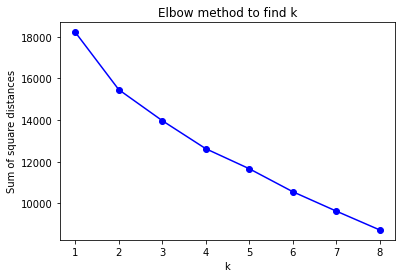

In [6]:
# plotting it
plt.plot(range(1,9), wcss_val, '-bo')
plt.xlabel('k')
plt.ylabel('Sum of square distances')
plt.title('Elbow method to find k')
plt.show()

In [7]:
knee = KneeLocator(range(1,9), wcss_val, curve='convex', direction='decreasing')
knee.elbow

3

Here, k=3 is chosen to be the elbow because the decrease in the error for the consequent parameter settings is rather small or becoming more flat. 

### 2.3) Silhouette method

In [23]:
s_coef = []
for k in range(2, 9): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    score = silhouette_score(df, kmeans.labels_)
    s_coef.append(score)

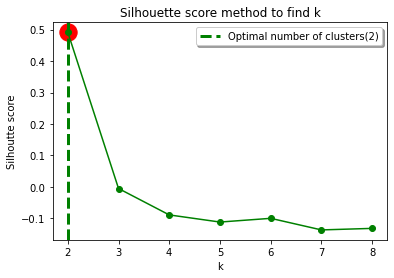

In [24]:
plt.plot(range(2,9), s_coef, '-go')
plt.xlabel('k')
plt.ylabel('Silhoutte score')
plt.title('Silhouette score method to find k')
k = np.argmax(s_coef) + 2
plt.axvline(x=k,
            linestyle = '--', c='green', linewidth = 3, 
            label = 'Optimal number of clusters({})'.format(k))

plt.scatter(k, s_coef[k-2], c="red", s=300)
plt.legend(shadow=True)
plt.show()

Here, k=2 is chosen as the silhouette score is the highest.

The result from the elbow method and silhouette in-conclusive. So, here, we will use k = 3.

## 3) Preparing the pipeline

In [10]:
# clustering algorithms used in our case
clustering_algorithms = [
    ('agglo', AgglomerativeClustering(n_clusters=3)),
    ('kMeans', KMeans(n_clusters=3)),
    ('Birch', Birch(threshold=0.01, n_clusters=3)),
    ('MeanShift', MeanShift()),
    ('OPTICS', OPTICS()),
     ('SpectralClustring',SpectralClustering(n_clusters=3))
                         ] 


In [11]:
cl_method = ['agglo',' kMeans','Birch','MeanShift','OPTICS','SpectralClustring']
sh_result = []
ch_result = []
db_result = []
clusters = []

for name, algorithm in clustering_algorithms:
    # pipe
    pre_pipe = Pipeline([
    ('scaler', StandardScaler()),('pca', PCA(n_components=2)), ("clusterer", algorithm)
    ])
    pre_pipe.fit(df)
    cluster = pre_pipe.fit_predict(df)
    
    #silhouette_score, calinski_harabasz_score, davies_bouldin_score
    sh = silhouette_score(df, cluster, metric='euclidean')
    ch = calinski_harabasz_score(df, cluster)
    db = davies_bouldin_score(df, cluster)
    
    # appending the values
    sh_result.append(sh)
    ch_result.append(ch)
    db_result.append(db)
    clusters.append(cluster)   
    result = pd.DataFrame(zip(cl_method, sh_result, ch_result, db_result), 
                      columns=["Clustring","Silhouette", "Callinszky", "Davies"])    

result

,Clustring,Silhouette,Callinszky,Davies
0,agglo,-0.037101,308.244101,2.282180
1,kMeans,0.066715,419.434259,3.842235
2,Birch,0.131454,402.563140,2.727655
3,MeanShift,-0.489316,27.388651,2.413077
4,OPTICS,-0.648997,6.268481,27.461647
5,SpectralClustring,-0.148302,396.023095,5.132824


In [12]:
result.sort_values(by=["Silhouette","Callinszky","Davies"], ascending = [False, False, True]).head()

,Clustring,Silhouette,Callinszky,Davies
2,Birch,0.131454,402.563140,2.727655
1,kMeans,0.066715,419.434259,3.842235
0,agglo,-0.037101,308.244101,2.282180
5,SpectralClustring,-0.148302,396.023095,5.132824
3,MeanShift,-0.489316,27.388651,2.413077


When I used PCA, K-means produces better results than others, where Silhouette = 0.070525, Callinszky = 426.291432 and Davies = 3.758157.

In [13]:
clustering_algorithms[1][1].labels_

array([1, 0, 0, ..., 0, 0, 1])

## 4) When we use PCA, K-means produces better results than others

      component1  component2  prediction
0       2.514615   -0.184094           1
1       0.496156   -0.758450           0
2      -1.179272   -0.358600           0
3      -0.297284   -0.063419           0
4       0.534596   -0.698550           0
...          ...         ...         ...
1450   -1.073126   -0.662531           0
1451   -0.885412   -0.540582           0
1452   -3.197524    0.154211           0
1453   -0.384971   -1.265717           0
1454    1.898211    2.224560           1

[1455 rows x 3 columns]


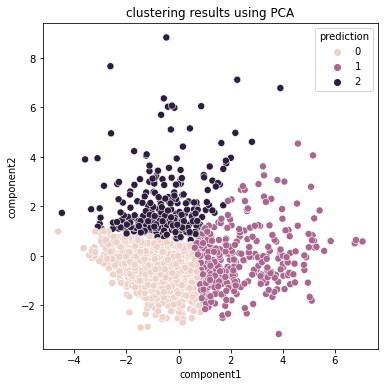

In [29]:
pcadf = pd.DataFrame(
    Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))]).fit_transform(df),
    columns=["component1", "component2"]
)
pcadf["prediction"] = clustering_algorithms[1][1].labels_
print(pcadf)

plt.figure(figsize=(6,6))

scatter = sns.scatterplot(
    data = pcadf,
    x = "component1",
    y = "component2",
    hue = "prediction",
    s = 50, # size of the mark
)
# plt.figure(figsize=(6,6))
# scatter = sns.scatterplot(
#     data = pcadf,
#     x = "component2",
#     y = "component3",
#     hue = "prediction",
#     s = 50, # size of the mark
# )

# plt.figure(figsize=(6,6))
# scatter = sns.scatterplot(
#     data = pcadf,
#     x = "component1",
#     y = "component3",
#     hue = "prediction",
#     s = 50, # size of the mark
# )
scatter.set_title("clustering results using PCA")

plt.show()

The visualization above shows the clusters we obtained, based on the two principal components from the dataset which are component1 and component2. It is easy to see the clear cut boundaries between clusters. It looks like the clusters roll around at center with each other otherwise it is much better.